# Applied Data Science Master’s degree programme 
Spatial Data Analysis and Simulation Modelling course  
Topics and case studies
## Datasets
1. Nitrogen Concentration for the Netherlands overall + roads (2011-2021)
2. Nitrogen Emissions from Companies (200)

### Data import Source #1
We will start by import the `data_import_emissions` function from `data_import.py`. This does the following things:
- Imports nitrogen emissions data for 2011-2021. It does this for both the country and roads.
- It generates a image for every year and creates an animation evolving over time (saved to .png + .gif)
- Returns the datasets in a dictionary + metadata info

In [2]:
from data_import import data_import_emissions, data_import_emissions_companies, data_import_baseline_metrics
emissions = data_import_emissions()  
meta_data = emissions.pop('meta')
print(meta_data)      

[['NCOLS' '280']
 ['NROWS' '320']
 ['XLLCORNER' '0']
 ['YLLCORNER' '300000']
 ['CELLSIZE' '1000']
 ['NODATA_VALUE' '-0.9990E+03']]


This is the nitrogen emission from 2021 as reported by the 'Rijksinstituut voor Volksgezondheid en Milieu (RIVM)'.

In [3]:
print(emissions['conc'][2011].shape) # 320km x 280km
print(emissions.keys()) #rwc, conc are the datasets

(320, 280)
dict_keys(['rwc', 'conc'])


![SegmentLocal](Results/Images/no2_rwc_animation_500.gif "segment")
![SegmentLocal](Results/Images/no2_conc_animation_500.gif "segment")

These 2 .gifs are generated: `Results/Images/no2_rwc_animation_500.gif` & `Results/Images/no2_conc_animation_500.gif`

They show the distribution of nitrogen pollution on roads (left) & overall nitrogen pollution (right). The dataset contains 10 years in total and the shape is 320km x 280km with a resolution of 1km x 1km.

### Data Import Source #2
The second data source contains the emissions on an individual company level. The following plot shows the Nitrogren emission per sector for the available years.

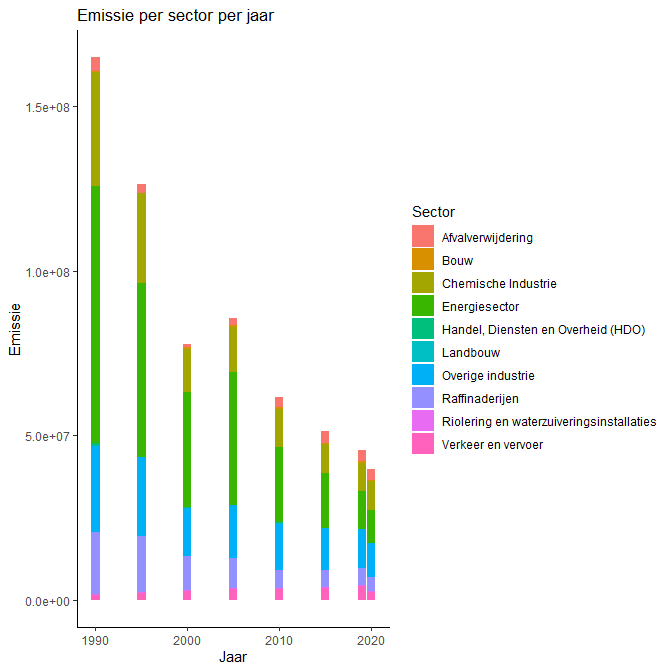

Note that we are missing a lot of data, so we are going to have to impute the missing years.

In [18]:
emissions_companies = data_import_emissions_companies() #all company rasters in dict (sum of emission + count)
dataset = {**emissions, **emissions_companies} #combine dicts
print(dataset.keys()) #what is in the dataset we just created

dict_keys(['rwc', 'conc', 'company_emission', 'company_count'])


All of the numpy arrays are 320x280 cells, each cell having a 1x1 km resolution.
- rwc: Nitrogren Emissions on Dutch roads, yearly 24h average.
- conc: Nitrogren Emissions Concentration in air, yearly 24h average.
- company_emission: Summed emissions from companies, yearly.
- company_count: Count of companies, yearly.

In [19]:
# calculate baseline model scores      
import matplotlib.pyplot as plt
import numpy as np
baseline_metrics = data_import_baseline_metrics()
print(baseline_metrics)

   year     naive   average metric
0  2012  0.405973  1.078918    MAE
1  2013  1.244165  1.261188    MAE
2  2014  1.064341  0.532219    MAE
3  2015  0.433244  0.237263    MAE
4  2016  0.257731  0.348840    MAE
5  2017  0.258117  0.286482    MAE
6  2018  0.342809  0.261469    MAE
7  2019  0.354204  0.453531    MAE
8  2020  1.204043  1.499217    MAE
9  2021  0.392234  1.806756    MAE


The function `data_import_baseline_metrics()` is used to calculate baseline metrics for the prediction phase. This is done using the following simple time series forecasting methods:
- Naive: The last datapoint in the time series is used as a prediction for the next datapoint in the time series.
- Sliding window average: We take every datapoint up untill the datapoint we are trying to predict and calculate the mean for this period. (e.g. the average of 2011-2015 for predicting 2016)

The Mean Absolute Error (MAE) is calculated for both methods using the `mean_absolute_error()` function. Lets see how these simple forecasting methods perform by visualising the MAE over time.

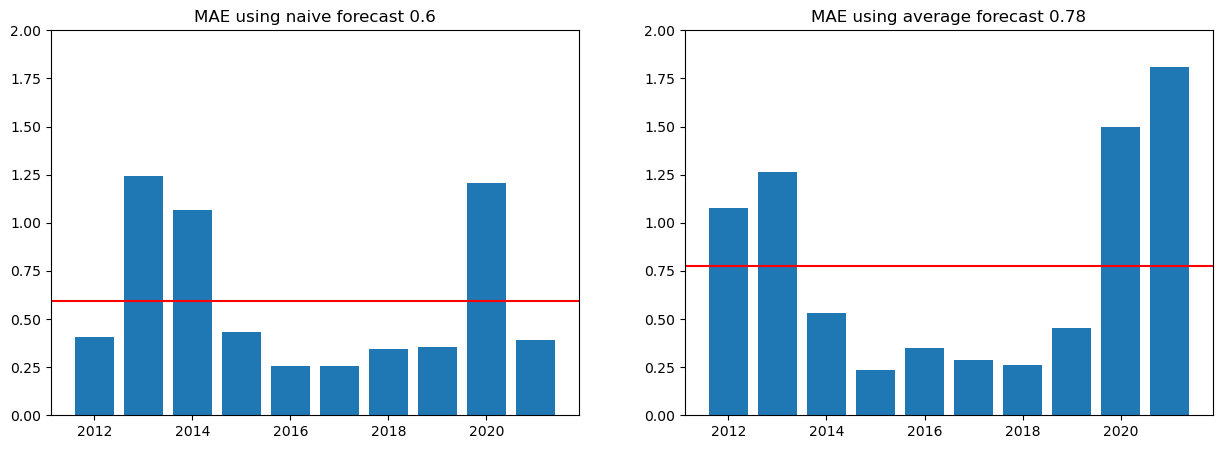

In [16]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].bar(baseline_metrics['year'], baseline_metrics['naive'])
ax[0].set_title(f'MAE using naive forecast {round(baseline_metrics["naive"].mean(), 2)}')
ax[0].axhline(y=np.nanmean(baseline_metrics['naive']), color = 'r')
ax[0].set_ylim(0, 2)
ax[1].bar(baseline_metrics['year'], baseline_metrics['average'])
ax[1].set_title(f'MAE using average forecast {round(baseline_metrics["average"].mean(), 2)}')
ax[1].axhline(y=np.nanmean(baseline_metrics['average']), color = 'r')
ax[1].set_ylim(0, 2)
plt.show()

Seems like the naive methods performs best. Mostly because the average forecast was off by a lot in 2021, this might be due to a rapid decrease in emissions due to Covid-19.